# Visualisations

In [1]:
import sys
import time
import re
import matplotlib as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

* We load the data from the Data Preparation Notebook.

In [2]:
merged_df = pd.read_csv('full.csv') # the whole data
gap_df = pd.read_csv('gap.csv')     # GAP citations
pac_df = pd.read_csv('pac.csv')     # GAP Packages citations

* We choose plotting style according to preference.

In [3]:
print(plt.style.available) # prints a list of what we have available

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [4]:
plt.style.use('fivethirtyeight')

### Website

<AxesSubplot:title={'center':'Website statistics on the whole data'}, ylabel='Provided?'>

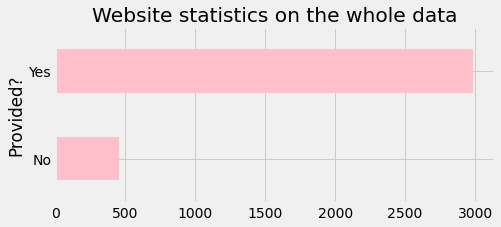

In [5]:
web_chart = merged_df['Website'].value_counts()
web_chart = web_chart.sort_values(ascending=True)
web_chart.plot(kind="barh", figsize=(7, 3), title='Website statistics on the whole data', 
                xlabel='Provided?', ylabel='Count', color='pink')

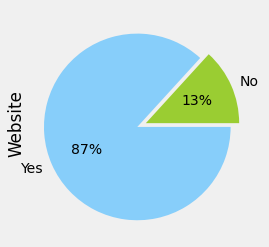

In [6]:
colors = ['yellowgreen', 'lightskyblue']
explode = (0, 0.1)
web_chart.plot(kind="pie", colors=colors, shadow=False, autopct='%1.0f%%', explode=explode)
plt.show()

<AxesSubplot:title={'center':'Website statistics on the Pure GAP data only'}, ylabel='Provided?'>

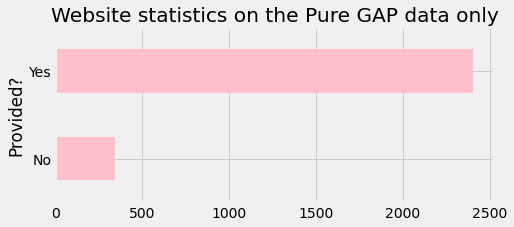

In [7]:
web_gap = gap_df['Website'].value_counts()
web_gap = web_gap.sort_values(ascending=True)
web_gap.plot(kind="barh", figsize=(7, 3), title='Website statistics on the Pure GAP data only', 
                xlabel='Provided?', ylabel='Count', color='pink')

<AxesSubplot:title={'center':'Website statistics on the Package citation data'}, ylabel='Provided?'>

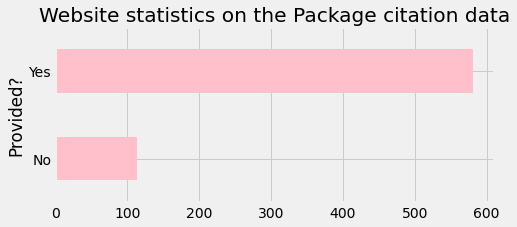

In [8]:
web_pac = pac_df['Website'].value_counts()
web_pac = web_pac.sort_values(ascending=True)
web_pac.plot(kind="barh", figsize=(7, 3), title='Website statistics on the Package citation data', 
                xlabel='Provided?', ylabel='Count', color='pink')

* Website statistics by Year

In [44]:
site_year = merged_df.groupby(['Website', 'Year'])['Year'].count().unstack('Website').fillna(0)
site_year_df = pd.DataFrame(data=site_year)
site_year_df

Website,No,Yes
Year,,
1992,1.0,0.0
1993,2.0,0.0
1994,1.0,0.0
1997,20.0,0.0
1998,14.0,2.0
1999,20.0,1.0
2000,45.0,16.0
2001,44.0,46.0
2002,30.0,37.0


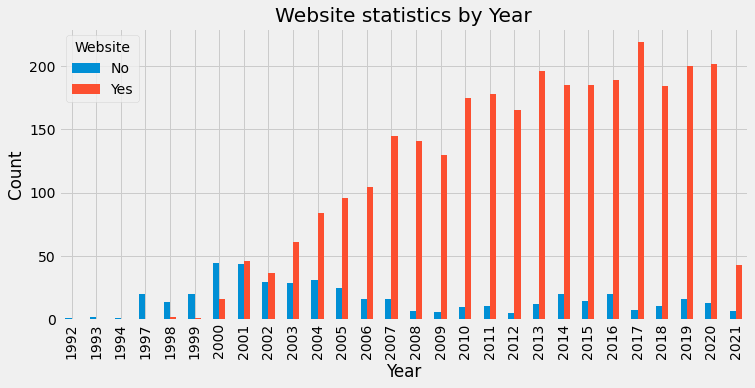

In [45]:
site_year_df.plot(kind="bar", subplots=False, figsize=(11, 5),
                  title='Website statistics by Year', 
                  xlabel='Year', ylabel='Count')
plt.show()

* We can see that in the beginning, up to 2000 the number of citations without a website reference was much higher. Then this trend reverses. On this barchart we can also observe the sharp increase of recorded citations altogether starting from 1997 and reaching a pique in 2017. 

### Lenght
* Most citations are around 110 characters long.

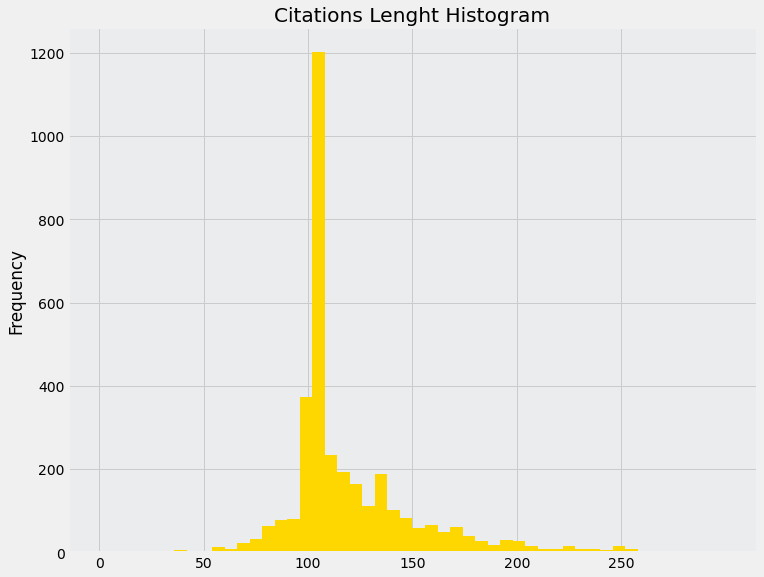

In [11]:
merged_df['Lentght'] = merged_df['Citation'].apply(len)
cit_len = merged_df['Lentght'].plot(kind='hist', bins=50, figsize=(11,9), stacked=True, 
                         xticks = range(0, 300, 50), 
                         range=(0, 300), 
                         color='gold', 
                         title='Citations Lenght Histogram', 
                         xlabel="lenght")
cit_len.set_facecolor('#ebeced')


### Scatter plot displaying lenght of citations by year.

<AxesSubplot:xlabel='Year', ylabel='Lenght'>

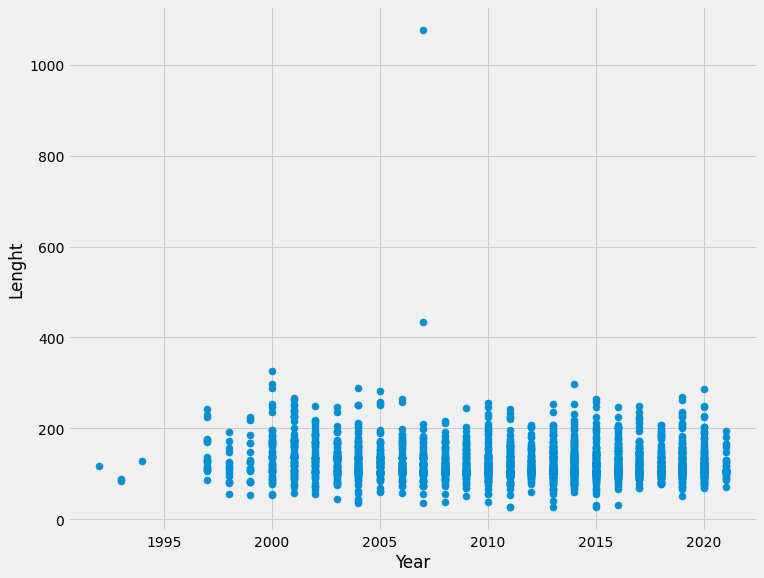

In [12]:
merged_df.plot(kind='scatter', y = 'Lenght', x = 'Year', figsize=(11,9),
              s=50)

* We have two outliers, one of them is an error and the other one is citing GAP but mentioning both St Andrews and Braunschweig universities. We will remove these two entries to make the scatter plot more clear.

In [13]:
merged_df[merged_df['Lenght']>400]

,MR,Author,Journal,Year,Publication Type,MSC,Citation,Version,Website,Lenght,Accuracy Score,Lentght
272,2299794,"Assmann, B. and Eick, B.",Math. Comp.,2007,article,20F16,"The GAP Group. GAP–Groups, Algorithms and Prog...",Unknown,Yes,434,2,434
758,2351139,"Cameron, P. and Cilleruelo, J. and Serra, O.",Rev. Mat. Iberoam.,2007,article,05D10,"[1] Datskovsky, B. A.: On the number of monoch...",4.3,Yes,1076,3,1076


In [14]:
print(merged_df.iloc[758]['Citation'])
print(merged_df.iloc[272]['Citation'])


[1] Datskovsky, B. A.: On the number of monochromatic Schur triples. Adv.in Appl. Math. 31 (2003), no. 1, 193–198.[2] The GAP Group: GAP —Groups, Algorithms, and Programming, Ver-sion 4.3. Aachen, St Andrews, 2002. www-gap.dcs.st-and.ac.uk/~gap.[3] Graham, R., Rödl, V. and Ruciński, A.: On Schur properties of ran-dom subsets of integers. J. Numb. Theory 61 (1996), no. 2, 388-408.[4] Schoen, T.: The Number of Monochromatic Schur Triples. European J.Combinatorics 20 (1999), no. 8, 855-866.[5] Robertson, A. and Zeilberger, D.: A 2-coloring of [1, N] can have(1/22)N2 + O(N) monochromatic Schur triples, but not less! Electron. J.Combin. 5 (1998), Research Paper 19, 4 pp.Recibido: 23 de noviembre de 2005.Peter CameronSchool of Mathematical SciencesQueen Mary, University of LondonMile End RoadLondon E1 4NS, UKP.J.Cameronqmul.ac.ukJavier CillerueloDepartamento de MatemáticasUniversidad Autónoma de Madrid28049, Madrid, Spainfranciscojavier.cilleruelouam.esOriol SerraDept. Matem`atica Aplicada I

In [15]:
outliers = merged_df[merged_df['Lenght']>400].index
len_scatter = merged_df.drop(outliers)
len_scatter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3438 entries, 0 to 3439
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   MR                3438 non-null   int64 
 1   Author            3438 non-null   object
 2   Journal           3438 non-null   object
 3   Year              3438 non-null   int64 
 4   Publication Type  3438 non-null   object
 5   MSC               3438 non-null   object
 6   Citation          3438 non-null   object
 7   Version           3438 non-null   object
 8   Website           3438 non-null   object
 9   Lenght            3438 non-null   int64 
 10  Accuracy Score    3438 non-null   int64 
 11  Lentght           3438 non-null   int64 
dtypes: int64(5), object(7)
memory usage: 255.2+ KB


<AxesSubplot:xlabel='Year', ylabel='Lenght'>

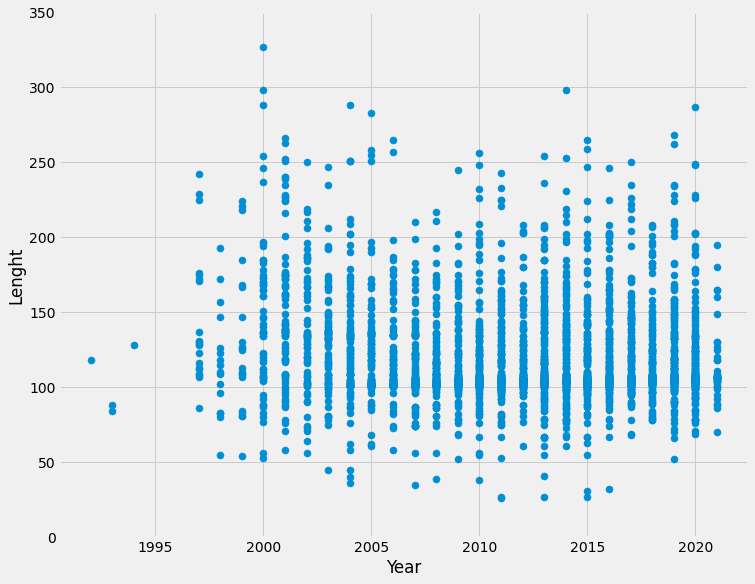

In [16]:
len_scatter.plot(kind='scatter', y = 'Lenght', x = 'Year', figsize=(11,9),
              s=50, 
              yticks = range(0, 400, 50))
                         

### Version

<AxesSubplot:title={'center':'Top 35 most cited GAP versions'}, xlabel='Version', ylabel='Count'>

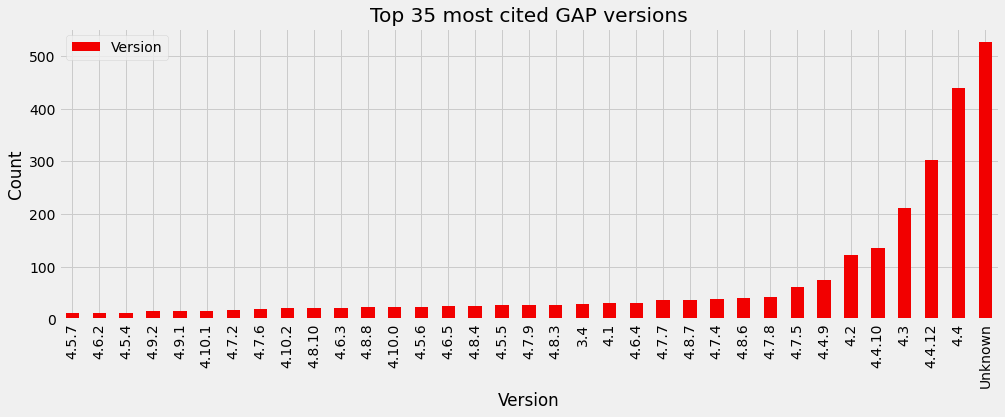

In [17]:
ver = gap_df['Version'].value_counts()
ver = ver.head(35)
ver = ver.to_frame()
ver = ver.sort_values(by='Version', ascending=True) # sort chrono. compare version numbers
ver = ver.dropna()
ver.plot(kind="bar", figsize=(15, 5), title='Top 35 most cited GAP versions', xlabel='Version', 
                ylabel='Count', color='#f20000')

* We can see that the most popular GAP versions cited are subversions of GAP 4, between 4.2 and 4.4

### All versions by Year scatterplot

<AxesSubplot:title={'center':'All cited GAP versions by year'}, xlabel='Year', ylabel='Version'>

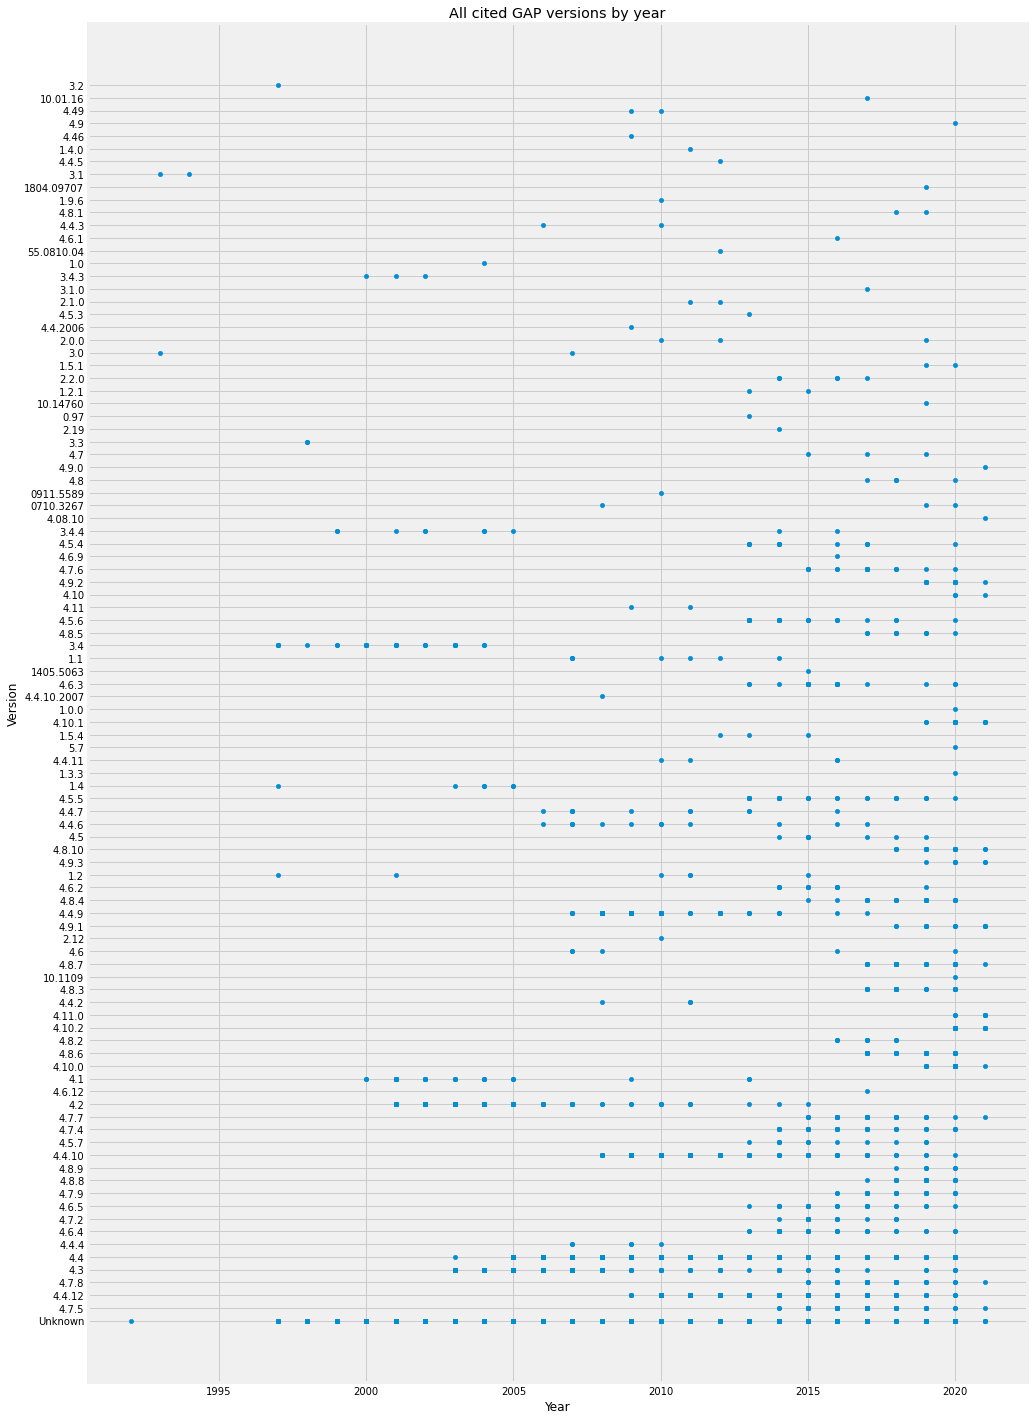

In [133]:
gap_df.plot(kind="scatter", x='Year', y='Version', figsize=(15, 25), title='All cited GAP versions by year')

### Authors

* Top 20 authors citing GAP and its packages in their work.

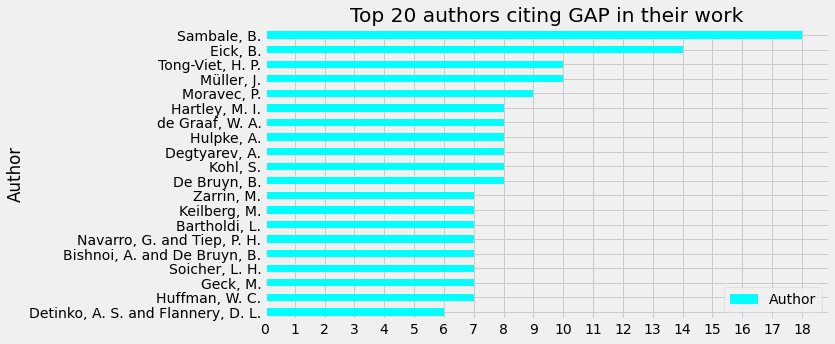

In [18]:
authors = gap_df['Author'].value_counts()
top = authors.head(20)
top = top.sort_values(ascending=True)
top = top.to_frame()
chart = top.plot(kind="barh",
                 figsize=(9,5), title='Top 20 authors citing GAP in their work', 
                 xlabel='Author', 
                 ylabel='Count', color='cyan', 
                  xticks=range(0, 19, 1))
# how do we treat joint papers ?

* Top 20 authors citing GAP Packages

In [19]:
author = pac_df['Author'].value_counts()
top20 = author.head(20)
top20 = top20.sort_values(ascending=False)
top20 = top20.to_frame()
top20

#chart = top20.plot(kind="bar",
#                 figsize=(9,5), title='Top 20 authors citing GAP Packages', 
#                 xlabel='Author', 
#                 ylabel='Count', color='brown', 
#                  xticks=range(0, 19, 1))

,Author
"Koshitani, S. and Müller, J. and Noeske, F.",10
"Bächle, A. and Margolis, L.",10
"Soicher, L. H.",8
"Eick, B.",7
"Kohl, S.",6
"Eick, B. and Horn, M.",6
"Douglas, A. and Repka, J.",6
"de Graaf, W. A.",5
"Linton, S. and Hammond, K. and Konovalov, A. and Brown, C. and Trinder, P. W. and Loidl, H. -. and Horn, P. and\nRoozemond, D.",5
"Assmann, B. and Eick, B.",5


### Year

##### Barchart dislaying number of GAP citations per year.

* GAP citation counts for each year, sorted chronologically.

<AxesSubplot:title={'center':'Annual GAP citations data'}, xlabel='Year', ylabel='Count'>

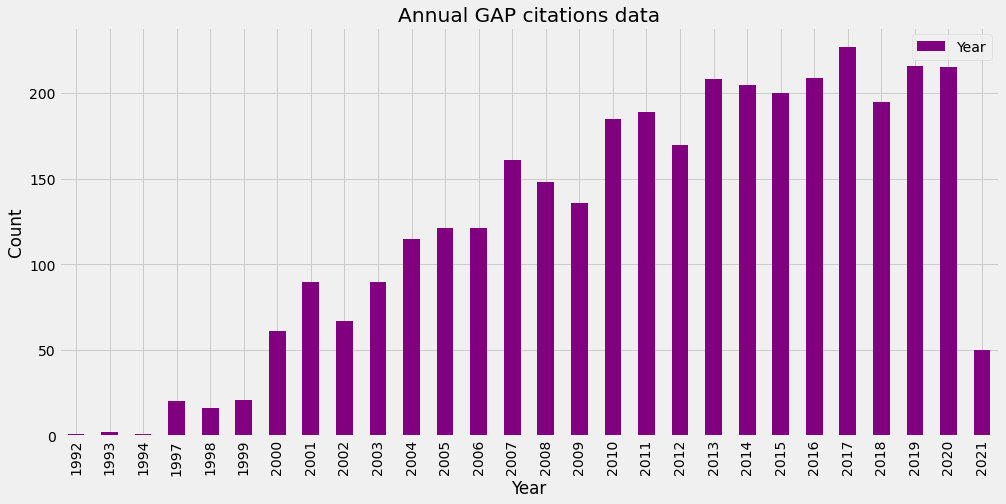

In [20]:
year_chrono = merged_df['Year'].value_counts()
chrono_df = year_chrono.to_frame()
chrono = chrono_df.sort_index()
chrono.plot(kind="bar", figsize=(15, 7), title='Annual GAP citations data', xlabel='Year', 
                ylabel='Count', color='purple')

### Top 20 journals citing GAP.

In [21]:
top_journals = gap_df['Journal'].value_counts()
top_20 = pd.DataFrame(top_journals.head(20))
top_20.reset_index()

,index,Journal
0,J. Algebra,380
1,Comm. Algebra,176
2,J. Symbolic Comput.,96
3,Discrete Math.,87
4,J. Algebra Appl.,85
5,J. Group Theory,69
6,Internat. J. Algebra Comput.,59
7,Des. Codes Cryptogr.,59
8,J. Pure Appl. Algebra,56
9,LMS J. Comput. Math.,46


* Journals by year

In [22]:
jou_year = merged_df.groupby(['Year'])['Journal']
jou_year = pd.DataFrame(data=jou_year)
jou_year.head()

,0,1
0,1992,"3047 Math. Comp. Name: Journal, dtype: object"
1,1993,1548 Math. Comp. 2895 Math. Comp. Name: ...
2,1994,"3142 Math. Comp. Name: Journal, dtype: object"
3,1997,54 Proc. London Math. Soc. (3) 531 ...
4,1998,406 J. Math. Soc. Japan 666 ...


### The most frequent type of work citing GAP: we can see that GAP is predominantly cited in articles - 2976 times.

In [23]:
types_pub = pd.DataFrame(merged_df['Publication Type'].value_counts())
types_pub.columns = ['GAP Citations Count']
types_pub.index.names = ['Publication Type']
types_pub

,GAP Citations Count
Publication Type,
article,3393
incollection,43
inproceedings,4


### Accuracy

<AxesSubplot:title={'center':'GAP citations Acuracy data'}, ylabel='Accuracy Score'>

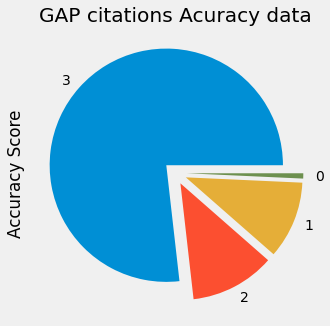

In [24]:
acc = merged_df['Accuracy Score'].value_counts()
acc.plot(kind="pie", figsize=(5, 5), title='GAP citations Acuracy data', xlabel='Score', 
                explode=(0.1, 0.1, 0.1, 0.1))

* Annual average of Accuracy sores

<AxesSubplot:title={'center':'Annual average of Accuracy sores'}, xlabel='Year', ylabel='Score'>

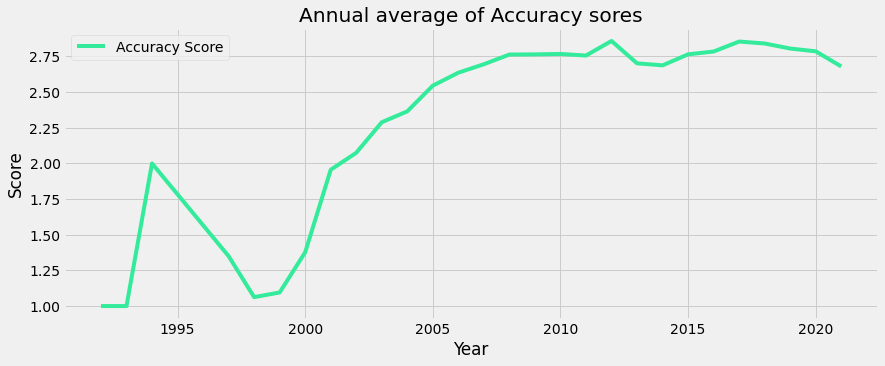

In [25]:
ttt = merged_df.groupby('Year')['Accuracy Score'].mean()
ttt = pd.DataFrame(data=ttt)
ttt.plot(kind='line', figsize=(13, 5), title='Annual average of Accuracy sores', xlabel='Year', 
                ylabel='Score', color='#34eb9b')

<AxesSubplot:xlabel='Year', ylabel='Accuracy Score'>

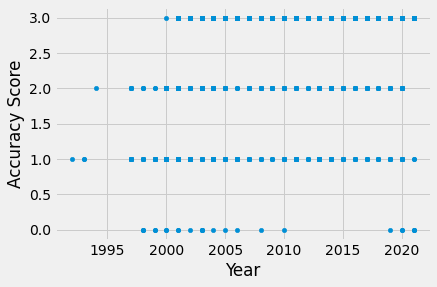

In [26]:
df7 = gap_df.groupby(['Accuracy Score', 'Year'])['Year'].count().unstack('Year').fillna(0)
df7
gap_df.plot(kind='scatter', y='Accuracy Score', x='Year')

### Releases by year

We will use `gap_df` containing only GAP citations with versions provided, all other entries such as Package citations are not needed.

In [27]:
versions_cited = gap_df['Version'].unique()

In [28]:
versions_cited

array(['Unknown', '4.7.5', '4.4.12', '4.7.8', '4.3', '4.4', '4.4.4',
       '4.6.4', '4.7.2', '4.6.5', '4.7.9', '4.8.8', '4.8.9', '4.4.10',
       '4.5.7', '4.7.4', '4.7.7', '4.2', '4.6.12', '4.1', '4.10.0',
       '4.8.6', '4.8.2', '4.10.2', '4.11.0', '4.4.2', '4.8.3', '10.1109',
       '4.8.7', '4.6', '2.12', '4.9.1', '4.4.9', '4.8.4', '4.6.2', '1.2',
       '4.9.3', '4.8.10', '4.5', '4.4.6', '4.4.7', '4.5.5', '1.4',
       '1.3.3', '4.4.11', '5.7', '1.5.4', '4.10.1', '1.0.0',
       '4.4.10.2007', '4.6.3', '1405.5063', '1.1', '3.4', '4.8.5',
       '4.5.6', '4.11', '4.10', '4.9.2', '4.7.6', '4.6.9', '4.5.4',
       '3.4.4', '4.08.10', '0710.3267', '0911.5589', '4.8', '4.9.0',
       '4.7', '3.3', '2.19', '0.97', '10.14760', '1.2.1', '2.2.0',
       '1.5.1', '3.0', '2.0.0', '4.4.2006', '4.5.3', '2.1.0', '3.1.0',
       '3.4.3', '1.0', '55.0810.04', '4.6.1', '4.4.3', '4.8.1', '1.9.6',
       '1804.09707', '3.1', '4.4.5', '1.4.0', '4.46', '4.9', '4.49',
       '10.01.16', '3.2'], dtype

* Number of Citations by year of cited GAP release, in textual and graphic forms.

In [29]:
rel_years = gap_df['ReleaseYear'].value_counts()
rel_years = pd.DataFrame(data=rel_years)
rel_years

,ReleaseYear
Unknown,930
2004,449
2008,307
2002,211
2007,135
2000,122
2014,120
2013,112
2015,105
2006,86


data.loc[sorted(data.index.intersection(range(1997, 20216)))].plot(kind="bar", 
                figsize=(11, 5), title='Citations by year of cited GAP release', xlabel='Years', 
                ylabel='Count', color='green')

In [30]:
years = gap_df['Year'].unique()
dat = gap_df['Year'].value_counts()
g = gap_df['Version'].value_counts()
ver = gap_df['Version'].unique()

### Types of GAP citing publications by year.
* Articles are the dominating type.

In [31]:
gap_df['Publication Type'].value_counts()

article          2703
incollection       39
inproceedings       4
Name: Publication Type, dtype: int64

In [41]:
yea = gap_df.groupby(['Publication Type', 'Year'])['Publication Type'].count().unstack('Publication Type').fillna(0)
yea = pd.DataFrame(data=yea)
yea

Publication Type,article,incollection,inproceedings
Year,,,
1992,1.0,0.0,0.0
1993,2.0,0.0,0.0
1994,1.0,0.0,0.0
1997,20.0,0.0,0.0
1998,15.0,1.0,0.0
1999,19.0,0.0,0.0
2000,46.0,10.0,0.0
2001,65.0,11.0,1.0
2002,46.0,9.0,0.0


<AxesSubplot:title={'center':'Citations by year of cited GAP release'}, xlabel='Years', ylabel='Count'>

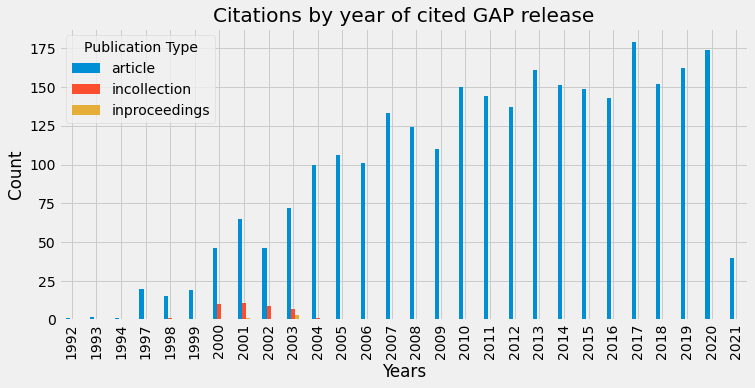

In [42]:
yea.plot(kind="bar", subplots=False,  
                figsize=(11, 5), title='Citations by year of cited GAP release', xlabel='Years', 
                ylabel='Count')

# Delay in picking up new GAP releases
* Column `delay` = release year - year values. Some `ReleaseYear` cells contain `Unknown` hence we have 1816 entries to work with on this query, which is enought to get a good notion of the trends.

In [34]:
gap_df[gap_df['ReleaseYear'] != 'Unknown'].count()

MR                  1816
Author              1816
Journal             1816
Year                1816
Publication Type    1816
MSC                 1816
Citation            1816
Version             1816
Website             1816
Lenght              1816
Accuracy Score      1816
ReleaseYear         1816
Delay               1816
dtype: int64

Below is the data in graphical form. The longest delays on record are 17 and 18 years but we only have a few such cases. There is one negative values, but it will not affect our visualisation.

In [35]:
tail = gap_df['Delay'].value_counts()
tail = pd.DataFrame(data=tail)
tail = tail.sort_index(ascending=False)
tail

,Delay
18,3
17,2
16,15
15,12
14,20
13,16
12,32
11,30
10,52
9,48


There is one negative value, but it will not affect the general results.

In [36]:
gap_df.loc[gap_df['Delay'] < 0]

,MR,Author,Journal,Year,Publication Type,MSC,Citation,Version,Website,Lenght,Accuracy Score,ReleaseYear,Delay
2050,1958966,"Moore, E. H. and Pollatsek, H.",Des. Codes Cryptogr.,2003,article,05B10,"M. Schönert et al., GAP: Groups, Algorithms an...",4.4,No,140,2,2004,-1


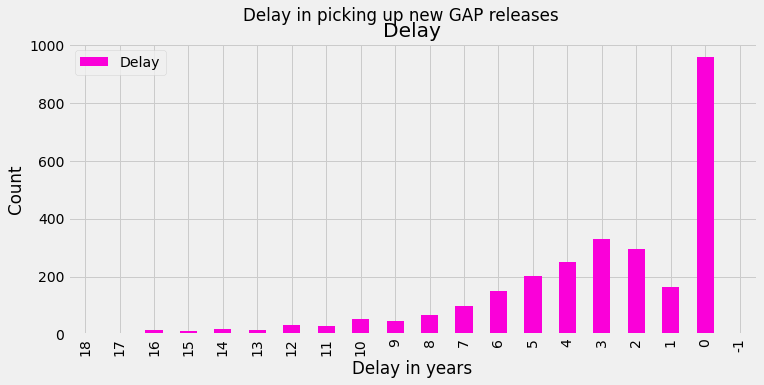

In [37]:
tail.plot(kind="bar", subplots=True,  
                figsize=(11, 5), title='Delay in picking up new GAP releases', xlabel='Delay in years', 
                ylabel='Count', color='#fa00d9')
plt.show()

More than half of the entries have 0 delay which means GAP versions were cited during the same year they were released. Amongst the entries with positive delay those with 1 to 6 years delay are most common with 3 years being the most frequent.

# Interactive

In [46]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
%matplotlib inline
import cufflinks as cf

### Dataset timeline filter 

In [129]:
years_list = gap_df['Year'].unique()
years_list = np.sort(years_list)[::-1] #sort the NumPy array in descending order
years_list

array([2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011,
       2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000,
       1999, 1998, 1997, 1994, 1993, 1992], dtype=int64)

In [130]:
# Interact with specification of arguments
@interact
def period_selector(Year=years_list, 
                            operator=['Up to', 'For this year', 'After']):
    column='Year'
    if operator == 'For this year':
        return gap_df.loc[gap_df[column] == Year]
    if operator == 'Up to':
        return gap_df.loc[gap_df[column] <= Year]
    if operator == 'After':
        return gap_df.loc[gap_df[column] > Year]

interactive(children=(Dropdown(description='Year', options=(2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 20…

### Interactive pie chart displaying accuracy scores ratio for selected year

In [145]:
@interact
def released_year_selector(Year = years_list):
    description='Select Year:'
    to_plot = merged_df[merged_df['Year'] == Year]
    to_plot = to_plot['Accuracy Score'].value_counts()
    return to_plot.plot(kind="pie", figsize=(5, 5), title='Annual GAP citations Acuracy data', xlabel='Score', 
                )

interactive(children=(Dropdown(description='Year', options=(2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 20…

### Version breakdown by year

In [132]:
@interact
def released_year_selector(Year = years_list):
    description='Select Year:'
    to_plot = gap_df[gap_df['Year'] == Year]
    to_plot = to_plot.groupby(['Version', 'Year'])['Version'].count().unstack('Version').fillna(0)
    return to_plot.plot(kind="bar", figsize=(15, 11),
                        title='GAP versions cited by year')
#    plt.legend(prop={'size': 19})
#    plt.show()

interactive(children=(Dropdown(description='Year', options=(2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 20…

### Interactive bar chart displaying website statistics by year

In [136]:
@interact
def period_selector(Year=years_list, operator=['Up to', 'For this year', 'After']):
    column='Year'
    if operator == 'For this year':
        site_year = gap_df.loc[gap_df[column] == Year]
        site_year = site_year.groupby(['Website', 'Year'])['Year'].count().unstack('Website')
        site_year_df = pd.DataFrame(data=site_year)
        return site_year_df.plot(kind="bar", subplots=False, figsize=(11, 5),
                  title='Website statistics by Year', 
                  xlabel='Year', ylabel='Count')
    if operator == 'Up to':
        site_year = gap_df.loc[gap_df[column] <= Year]
        site_year = site_year.groupby(['Website', 'Year'])['Year'].count().unstack('Website')
        site_year_df = pd.DataFrame(data=site_year)
        return site_year_df.plot(kind="bar", subplots=False, figsize=(11, 5),
                  title='Website statistics by Year', 
                  xlabel='Year', ylabel='Count')
    if operator == 'After':
        site_year = gap_df.loc[gap_df[column] > Year]
        site_year = site_year.groupby(['Website', 'Year'])['Year'].count().unstack('Website')
        site_year_df = pd.DataFrame(data=site_year)
        return site_year_df.plot(kind="bar", subplots=False, figsize=(11, 5),
                  title='Website statistics by Year', 
                  xlabel='Year', ylabel='Count')

interactive(children=(Dropdown(description='Year', options=(2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 20…

* Filter the citations data by year

### Now we will create an interactive bar chart allowing user to select a publication year and then displaying numbers of GAP releases cited grouped in separate bars for each release year.

In [51]:
filtered_df = gap_df[gap_df['ReleaseYear'] != 'Unknown']

In [52]:
rel_list = filtered_df['Year'].unique()
rel_list = np.sort(rel_list)
rel_list = rel_list.astype(int)
rel_list

array([1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020, 2021])

In [53]:
df3 = filtered_df.groupby(['Year', 'ReleaseYear'])['ReleaseYear'].count().unstack('Year').fillna(0)

#df3.iloc[0].plot.pie(subplots=False, legend=False, figsize=(15, 11))

In [54]:
@interact
def released_year_selector(Year=rel_list):
    description='Select Release Year:'
    to_plot = df3[Year]
    return to_plot.plot.bar(figsize=(9, 9))

interactive(children=(Dropdown(description='Year', options=(1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 20…

In [ ]:
# Interact with specification of arguments
@interact
def column_and_value(column=['Year', 'Accuracy Score', 'Lenght'], 
                            x=(1, 3000, 1)):
    return gap_df.loc[gap_df[column] == x]

Versions / year
top authors / year
data per year

In [ ]:
def get_info(db, food, nutrient):
    food_info = db
    for word in food.split():
        food_info = food_info[food_info['Food'].str.contains(word, case=False)]
    nutritional_info = food_info[food_info['Nutrient'] == nutrient]
    return nutritional_info

interact(lambda food, nutrient: get_info(db, food, nutrient),
        food='',
        nutrient=list(db['Nutrient'].unique()))

In [ ]:
def get_info(db, author, citation):
    auth_info = db
    for word in author.split():
        auth_info = auth_info[auth_info['Author'].str.contains(word, case=False)]
    cit_info = auth_info[auth_info['Citation'] == citation]
    return cit_info

interact(lambda author, citation: get_info(gap_df, author, citation),
        author = '',
        citation = list(gap_df['Citation'].unique()))

In [ ]:
def get_aut(db, author):
    auth_info = db
    for word in author.split():
        auth_info = auth_info[auth_info['Author'].str.contains(word, case=False)]
    return auth_info


interact(get_aut(merged_df, author), author = '')

In [ ]:
yeaaa = widgets.FloatSlider(min=min(gap_df['Year']), max=max(gap_df['Year']), step=1, description='Year')
display(yea)

In [ ]:
import ipywidgets as widgets
from IPython.display import display




%matplotlib nbagg

x = np.linspace(0, 2, 1000)
fig, ax = plt.subplots(1, figsize=(10, 4))
plt.suptitle('Sine Wave')


def update_plot(amp, phase, freq):
    
    ax.clear()
    y = amp * np.sin(freq * 2 * np.pi * x + phase * 2 * np.pi)
    units = 'amp = {} $(psi)$ \nphase = {} $(s)$ \nfreq = {} $(Hz)$'
    
    ax.plot(x, y, label=units.format(amp, phase, freq))
    ax.set_xlim(x[0], x[-1])
    ax.legend(loc=1)
    ax.set_xlabel('$(s)$')
    plt.show()


amp = widgets.FloatSlider(min=1, max=10, value=1, description='Amp:')
phase = widgets.FloatSlider(min=0, max=5, value=0, description='Phase:')
freq = widgets.FloatSlider(min=1, max=10, value=1, description='Freq:')
    
widgets.interactive(update_plot, amp=amp, phase=phase, freq=freq)

In [ ]:
t=pd.DataFrame({'string':['i live here','you live in eltham','machine learning','learning english','go home','go back','live home'],
                'number':[1,3,2,3,1,2,4],
                'word':['a','haha','runing over there','abcdefg','aaa','bye','hou']})

def myFUN_searchString(value,string):
    s=string.split(' ')
    return value in s

def myFUN_search(value):
    t.loc[:,'Flag']=''
    t.loc[:,'Flag']=[myFUN_searchString(value,x) for x in t.loc[:,'string']]
    return t.loc[:,'Flag']

keyword=widgets.Text(
    value='electricity',
    placeholder='Type something',
    description='keyword:',
    disabled=False
)
display(keyword)


button = widgets.Button(description="search")
display(button)

output = widgets.Output()

@output.capture()
def on_button_clicked(b):
    t.loc[:,'Flag']=myFUN_search(keyword.value)
    t1=t.loc[(t['Flag'])]
    t1.drop(['Flag'],axis=1,inplace=True)
    t1.reset_index(drop=True,inplace=True)
    if t1.shape[0]>30:
        t1=t1.loc[0:30]

    display(t1)

button.on_click(on_button_clicked)
display(output)